In [1]:
!nvidia-smi

Mon Nov 18 05:14:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install diffusers transformers accelerate   #diff-models which generate image

In [3]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
!pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [6]:
model_id1="dreamlike-art/dreamlike-diffusion-1.0"
model_id2="stabilityai/stable-diffusion-xl-base-1.0"

In [7]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, USE_SAFETENSORS=True)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Keyword arguments {'USE_SAFETENSORS': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [22]:
prompt = "A cityscape at sunset"
 # pipe processes the text prompt

In [23]:
image = pipe(prompt).images[0]  # Get the first generated image


  0%|          | 0/50 [00:00<?, ?it/s]

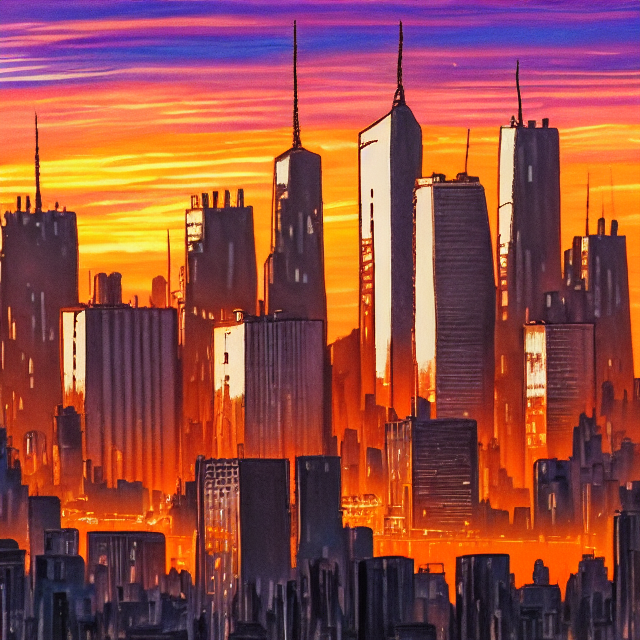

In [24]:
image

In [25]:
def generate_image(pipe, prompt, params):
    # Generate images using the pipeline
    img = pipe(prompt, **params).images
    num_images = len(img)  # Number of images generated

    if num_images > 1:
        # Create a subplot for multiple images
        fig, ax = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 5))
        for i in range(num_images):
            ax[i].imshow(img[i])
            ax[i].axis('off')
    else:
        # Display a single image
        fig = plt.figure()
        plt.imshow(img[0])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [26]:
prompt=" A beautiful girl playing festival of colors in indian attire"
params={}

  0%|          | 0/100 [00:00<?, ?it/s]

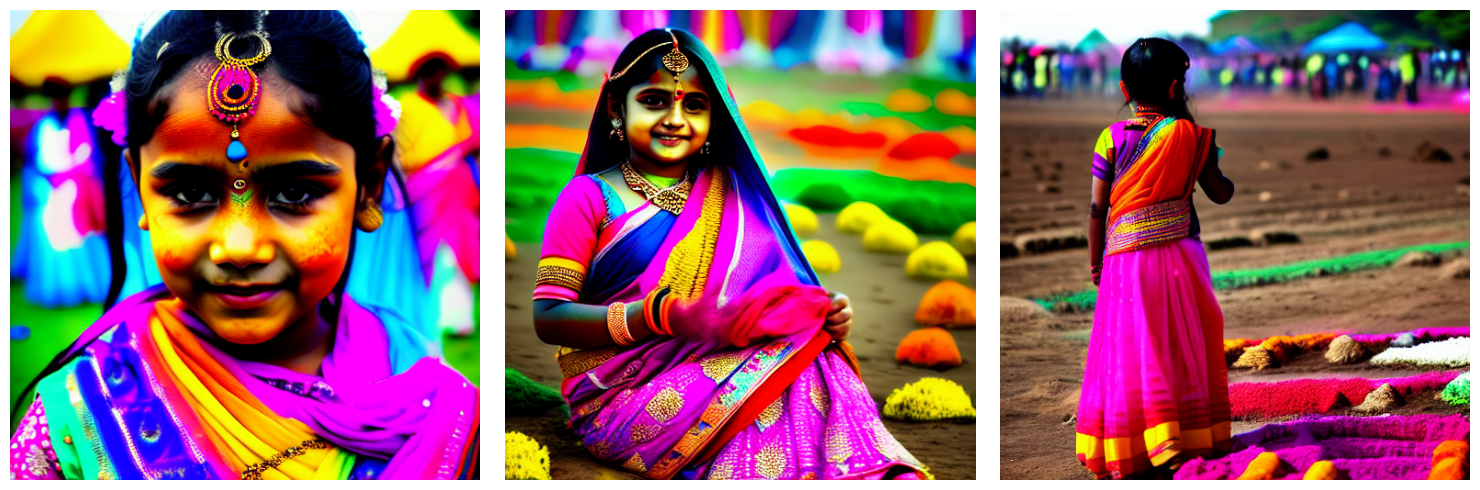

In [32]:
params = {
    "num_inference_steps":100,
    "width": 512,
    "height": 512,
    "num_images_per_prompt": 3,
     "negative_prompt": "ugly, distorted, blurry, bad anatomy, bad proportions"           # Number of images to generate
}
generate_image(pipe,prompt,params)